
# June 24, 2019 Reinforcement Learning Stochastic Environment
* name : Jikhan Jeong
* reference: https://hunkim.github.io/ml/
* stochastic environment = after action outcome has an uncertainity (eg, action = down, but result shows stay)
* using learning rate for handling uncertainity (1-learning rate) x Q(s,a) + learning rate[reward + discount factor x argmax Q(s', a')]
* however, by using open-ai, the uncertainity is given as an exogeneous enviornment rather than setting by me.
* in order to apply for the real world problem. I need to code for an environment with uncertanity concept

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr
import sympy

In [2]:
register(
    id='FrozenLake-v5',
    entry_point ='gym.envs.toy_text:FrozenLakeEnv',
    kwargs ={'map_name':'4x4',
            'is_slippery':True}  # is slippery True = Stocastic, Falue = Deterministic
)

In [3]:
env = gym.make('FrozenLake-v5')

C:\python\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [4]:
from PIL import Image
import numpy as np
import os

In [5]:
pwd

'C:\\Users\\정직한\\2019_Reinforcement Learning'

In [6]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8C77-271C

 C:\Users\정직한\2019_Reinforcement Learning 디렉터리

2019-06-24  오후 12:07    <DIR>          .
2019-06-24  오후 12:07    <DIR>          ..
2019-06-24  오후 12:02    <DIR>          .ipynb_checkpoints
2019-06-17  오전 12:01            19,493 June 16, 2019 RL e-greedy.ipynb
2019-06-02  오후 06:54            10,881 June 2, 2019_RL_basic_q_learning.ipynb
2019-06-24  오후 12:05             1,823 June 24, 2019 Reinforcement Learning Stochastic Env.ipynb
2019-06-24  오후 12:07           111,199 sto_q_learning.png
               4개 파일             143,396 바이트
               3개 디렉터리  65,894,825,984 바이트 남음


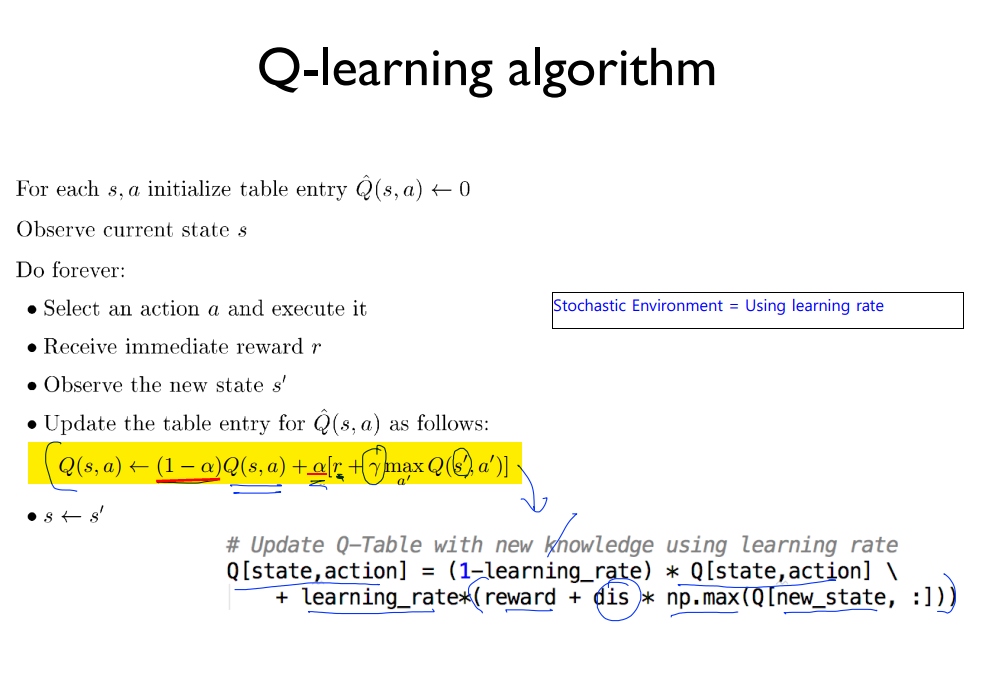

In [18]:
image_path ='sto_q_learning.png'
image = Image.open(image_path) # size = (991, 673)
image

* Fill an initial zeors into Q-table (=4x4 = 16 states, 4 actions = up,down, right, left)

In [19]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

* Set parameters

In [20]:
learning_rate = .85 # the higher, the faster converge
dis =.99
num_episodes = 1000 # iteration 

In [25]:
rList = []

In [26]:
for i in range(num_episodes):
    # reset env
    state = env.reset() # restart after episode i done
    rAll = 0
    done = False
    
    # Q table 
    while not done:
        # e-greedy exploration and exploitation
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) /(i+1))
        
        # get new state and reward from environment
        new_state, reward, done,_ = env.step(action)
        
        # update q-table with new knowledge using learning rate
        Q[state,action] = (1-learning_rate) * Q[state,action] + learning_rate*(reward + dis*np.max(Q[new_state,:]))
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

* Visiualize the result

In [27]:
print("Score over time: " + str(sum(rList)/num_episodes))
print("Final Q table value")
print(Q)

Score over time: 0.496
Final Q table value
[[1.62706684e-02 4.21499280e-01 1.94147166e-02 2.02203406e-02]
 [2.76966972e-03 2.23943747e-03 3.99539745e-04 2.73372601e-01]
 [1.85510428e-02 8.67402381e-03 4.55419777e-03 2.09983462e-01]
 [1.92973181e-03 2.13662090e-03 2.73476043e-04 1.96373879e-01]
 [6.23862337e-01 8.06204579e-05 5.20507401e-04 1.88500427e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.48387866e-04 6.64762043e-07 2.64426216e-02 1.03976750e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.02420700e-03 1.27343834e-03 1.51329571e-03 7.54997417e-01]
 [0.00000000e+00 8.54003972e-01 1.58746836e-04 1.50529257e-03]
 [5.50860560e-01 2.92335362e-03 2.49032690e-05 8.67764971e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.75256372e-03 8.54437256e-01 4.99992930e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.77903211e-01]
 [0.00000000

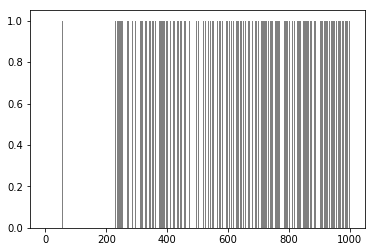

In [31]:
plt.bar(range(len(rList)), rList, color="gray")
plt.show()